In [1]:
from spacemathpy import *
import matplotlib.pyplot as plt
%matplotlib inline

# 2HDM

## Couplings
In the context of 2HDM-III can define the couplings $g_{htt}$, $g_{hbb}$, $g_{h\tau\tau}$ and $g_{hWW}$

In [2]:
#2HDM-III
def ghtt_2hdm(α,Att,Cab,tb):
    global mW,mt,g,SMvev
    if issymbolic(α,Att,Cab,tb):
        MW,Mt= mW['symbol'],mt['symbol']
        return (g['symbol']/2)*(Mt/MW)*(-sp.cos(α)/tb*sp.cos(sp.atan(tb)) + 
                sp.sqrt(2)*Cab/(g['symbol']*tb*sp.cos(sp.atan(tb)))*(MW/Mt)*(
                    Mt/SMvev['symbol'])*Att)
    else:
        MW,Mt= mW['value'],mt['value']
        return (g['value']/2)*(Mt/MW)*(-np.cos(α)/tb*np.cos(np.arctan(tb)) + 
                np.sqrt(2)*Cab/(g['value']*tb*np.cos(np.arctan(tb)))*(MW/Mt)*(
                    Mt/SMvev['value'])*Att)

symbolic definition of variables

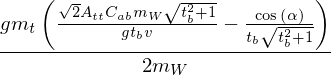

In [3]:
a,Att,Cab,tb = sp.symbols('alpha,A_{tt},C_{ab},t_b')
ghtt_2hdm(a,Att,Cab,tb)

numeric evaluation

In [4]:
ghtt_2hdm(0.1,0.2,0.3,0.4)

In [5]:
def ghbb_2hdm(α,Abb,Cab,tb):
    global mW,mb,g,SMvev
    if issymbolic(α,Abb,Cab,tb):
        MW,Mb= mW['symbol'],mb['symbol']
        return (g['symbol']/2)*(Mb/MW)*(-sp.sin(α)*tb/sp.sin(sp.atan(tb)) + 
                sp.sqrt(2)*(Cab*tb)/(g['symbol']*sp.sin(sp.atan(tb)))*(MW/Mb)*(
                    Mb/SMvev['symbol'])*Abb)
    else:
        MW,Mb= mW['value'],mb['value']
        return (g['value']/2)*(Mb/MW)*(-np.sin(α)*tb/np.sin(np.arctan(tb)) + 
                np.sqrt(2)*(Cab*tb)/(g['value']*np.sin(np.arctan(tb)))*(MW/Mb)*(
                    Mb/SMvev['value'])*Abb)

symbolic evaluation

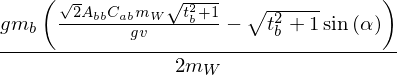

In [6]:
Abb = sp.symbols('A_bb')    
ghbb_2hdm(a,Abb,Cab,tb)

numeric evaluation

In [7]:
ghbb_2hdm(0.1,0.2,0.3,0.4)

In [8]:
def ghtautau_2hdm(α,Atata,Cab,tb):
    global mW,mta,g,SMvev
    if issymbolic(α,Atata,Cab,tb):
        MW,Mtau= mW['symbol'],mta['symbol']
        return (g['symbol']/2)*(Mtau/MW)*(-sp.sin(α)*tb/sp.sin(sp.atan(tb)) + 
                sp.sqrt(2)*(Cab*tb)/(g['symbol']*sp.sin(sp.atan(tb)))*(MW/Mtau)*(
                    Mtau/SMvev['symbol'])*Atata)
    else:
        MW,Mtau= mW['value'],mta['value']
        return (g['value']/2)*(Mtau/MW)*(-np.sin(α)/tb*np.sin(np.arctan(tb)) + 
                np.sqrt(2)*(Cab*tb)/(g['value']*np.sin(np.arctan(tb)))*(MW/Mtau)*(
                    Mtau/SMvev['value'])*Atata)

Atata = sp.symbols(r'A_{\tau\tau}')    
ghtautau_2hdm(a,Atata,Cab,tb)
ghtautau_2hdm(0.1,0.2,0.3,0.4)

In [9]:
def ghww_2hdm(sab):
    global mW,g
    if issymbolic(sab):
        MW,gg= mW['symbol'],g['symbol']
        return gg*MW*sab
    else:
        MW,gg= mW['value'],g['value']
        return gg*MW*sab

sab = sp.symbols('s_{ab}',real=True)
ghww_2hdm(sab)
ghww_2hdm(0.1)

In [10]:
def ghzz_2hdm(sab):
    global mZ,g
    if issymbolic(sab):
        MZ,gg= mZ['symbol'],g['symbol']
        return gg*MZ*sab
    else:
        MZ,gg= mZ['value'],g['value']
        return gg*MZ*sab

#sab = sp.symbols('s_{ab}',real=True)
ghzz_2hdm(sab)
ghzz_2hdm(0.1)

## Signal Strenght functions

Now, we need to define our Higgs streght signals in terms of our variables

In [11]:
rtautau = lambda Cab,tb,Att,Abb: Rtata(
    ghtt_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
    ghbb_2hdm(np.arccos(Cab) + np.arctan(tb),Abb,Cab,tb),
    ghtautau_2hdm(np.arccos(Cab) + np.arctan(tb),1,Cab,tb))

rbb = lambda Cab,tb,Att,Abb:Rbotbot(
    ghtt_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
    ghbb_2hdm(np.arccos(Cab) + np.arctan(tb),Abb,Cab,tb))

rgaga = lambda Cab,tb,Att,Abb,mCH:Rgaga(
    ghtt_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
    ghbb_2hdm(np.arccos(Cab) + np.arctan(tb),Abb,Cab,tb),
    ghww_2hdm(np.sqrt(1 - Cab**2)), 0, mCH)

rww = lambda Cab,tb,Att,Abb:RWW(
    ghtt_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
    ghbb_2hdm(np.arccos(Cab) + np.arctan(tb),Abb,Cab,tb),
    ghww_2hdm(np.sqrt(1 - Cab**2)))

rzz = lambda Cab,tb,Att,Abb:RWW(
    ghtt_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
    ghbb_2hdm(np.arccos(Cab) + np.arctan(tb),Abb,Cab,tb),
    ghzz_2hdm(np.sqrt(1 - Cab**2)))

## Allowed parameter space

We calculate the allowed parameter space to each signal

In [12]:
%time
data1s_rtau,data2s_rtau =Rtau.parameter_space2(
    rtautau,n=100000,Cab=[-1.0,1.0],tb=[0.1,5.0],
    Att=[0.0,1.0],Abb=[0.0,1.0])
data1s_rtau

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:41: RuntimeWarning: invalid value encountered in sqrt
  return -(1/4)*(np.log((1+np.sqrt(1-(((mS**2)/(4*mtop**2))**-1)))/(1-np.sqrt(1-(((mS**2)/(4*mtop**2))**-1))))*(-sp.I*np.pi))**2


,Cab,tb,Att,Abb,Rtau
0,-0.518405,0.465272,0.549802,0.254485,1.050462
1,0.944146,4.328548,0.602697,0.686248,1.191969
2,-0.988011,2.652152,0.953271,0.984399,1.138445
3,-0.178751,0.414549,0.340828,0.582339,0.972402
4,-0.336678,0.392813,0.637762,0.641356,1.164223
5,0.827505,3.750604,0.805010,0.084017,0.951521
6,0.899975,4.481629,0.633415,0.270692,1.141199
7,-0.329650,0.464061,0.420745,0.286516,1.022503
8,-0.882968,4.773378,0.608928,0.817900,1.016211
9,0.927659,4.173928,0.654431,0.386751,1.197116


In [13]:
Rtau.latex_name

'Rtau'

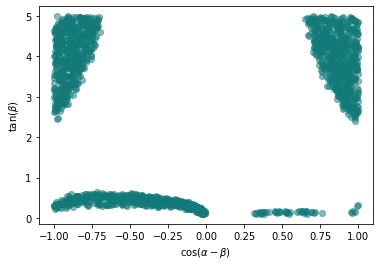

In [14]:
latex_names = {'Cab':r'$\cos(\alpha -\beta)$',
        'tb':r'$\tan(\beta)$',
        'Att':r'$A_{tt}$','Abb':r'$A_{bb}$','Rtau':r'$R_{\tau}$',
        'Rb':r'$R_b$','Rgamma':r'$R_{\gamma}$','Rw':r'$R_{W}$','Rz':r'$R_{Z}$'}
plot_df(data1s_rtau,colx='Cab',coly='tb',
        latex_names=latex_names)

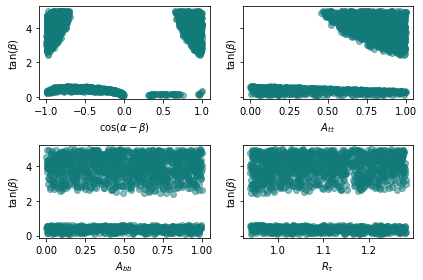

In [15]:
#list(data1s_rtau.keys()).remove('Cab')
plot_tabledf(data1s_rtau,coly='tb',latex_names=latex_names)